# Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
order_df= pd.read_csv('C:\\Users\\ADMIN\\Documents\\coffee_dataset\\orders.csv')
items_df= pd.read_csv('C:\\Users\\ADMIN\\Documents\\coffee_dataset\\items.csv')

In [3]:
order_df.head()

,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out
0,1,ORD001,12-02-2024 07:04,It008,1,Alex,out
1,2,ORD002,12-02-2024 07:09,It014,1,Jordan,in
2,3,ORD003,12-02-2024 07:14,It008,1,Taylor,out
3,4,ORD004,12-02-2024 07:18,It019,1,Casey,out
4,5,ORD005,12-02-2024 07:23,It024,1,Jamie,out


In [4]:
items_df.head()

,item_id,sku,item_name,item_cat,item_size,item_price
0,It001,HDR-CAP-MD,Cappuccino,Hot Drinks,Medium,3.45
1,It002,HDR-CAP-LG,Cappuccino,Hot Drinks,Large,3.75
2,It003,HDR-LAT-MD,Latte,Hot Drinks,Medium,3.45
3,It004,HDR-LAT-LG,Latte,Hot Drinks,Large,3.75
4,It005,HDR-FLT,Flat White,Hot Drinks,NaN,3.15


# Exploratory Data Analysis and Data Cleaning

In [5]:
df= order_df.merge(items_df,on= 'item_id')

In [6]:
df.head()

,row_id,order_id,created_at,item_id,quantity,cust_name,in_or_out,sku,item_name,item_cat,item_size,item_price
0,1,ORD001,12-02-2024 07:04,It008,1,Alex,out,HDR-ESP,Espresso,Hot Drinks,NaN,2.15
1,2,ORD002,12-02-2024 07:09,It014,1,Jordan,in,HDR-HCH-LG,Hot Chocolate,Hot Drinks,Large,4.60
2,3,ORD003,12-02-2024 07:14,It008,1,Taylor,out,HDR-ESP,Espresso,Hot Drinks,NaN,2.15
3,4,ORD004,12-02-2024 07:18,It019,1,Casey,out,CDR-ICT-MD,Iced Tea,Cold Drinks,Medium,3.25
4,5,ORD005,12-02-2024 07:23,It024,1,Jamie,out,SNK-SSM,Sandwich Salami&Mozzarella,Snacks,NaN,5.50


In [7]:
df.isnull().sum()

row_id         0
order_id       0
created_at     0
item_id        0
quantity       0
cust_name      0
in_or_out     71
sku            0
item_name      0
item_cat       0
item_size     81
item_price     0
dtype: int64

In [8]:
df['item_size'].fillna(df['item_size'].mode()[0],inplace= True)

In [9]:
df['in_or_out'].fillna(df['in_or_out'].mode()[0],inplace= True)

In [10]:
df.describe()

,row_id,quantity,item_price
count,466.000000,466.0,466.000000
mean,255.167382,1.0,3.985944
std,152.396039,0.0,0.740046
min,1.000000,1.0,2.150000
25%,119.250000,1.0,3.450000
50%,253.500000,1.0,4.000000
75%,387.750000,1.0,4.600000
max,520.000000,1.0,5.600000


In [11]:
df.describe(include= 'object')

,order_id,created_at,item_id,cust_name,in_or_out,sku,item_name,item_cat,item_size
count,466,466,466,466,466,466,466,466,466
unique,389,389,24,139,3,24,14,3,2
top,ORD041,12-02-2024 12:16,It005,Riley,out,HDR-FLT,Cold Mocha,Hot Drinks,Large
freq,3,3,27,24,274,27,47,277,277


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      466 non-null    int64  
 1   order_id    466 non-null    object 
 2   created_at  466 non-null    object 
 3   item_id     466 non-null    object 
 4   quantity    466 non-null    int64  
 5   cust_name   466 non-null    object 
 6   in_or_out   466 non-null    object 
 7   sku         466 non-null    object 
 8   item_name   466 non-null    object 
 9   item_cat    466 non-null    object 
 10  item_size   466 non-null    object 
 11  item_price  466 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 43.8+ KB


In [13]:
df['revenue']= df['item_price']*df['quantity']

# Data Analysis and Visualizations

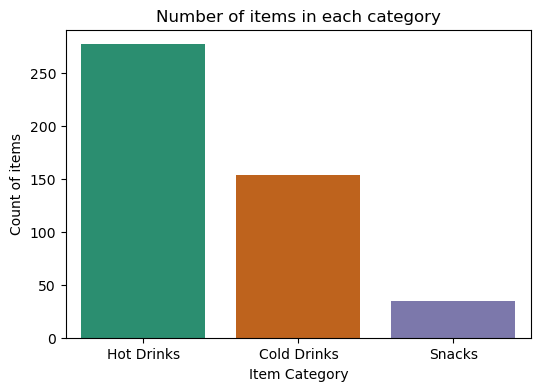

In [14]:
plt.figure(figsize= (6,4))
sns.countplot(x= 'item_cat',data= df,palette= 'Dark2')
plt.title('Number of items in each category')
plt.xlabel('Item Category')
plt.ylabel('Count of items')
plt.show()

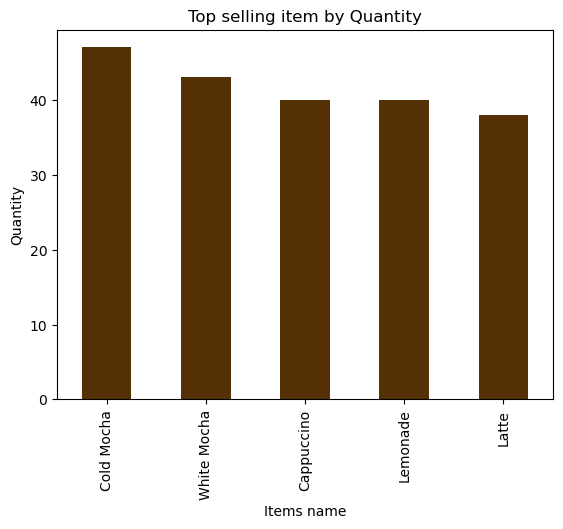

In [15]:
top_selling_item_by_qty= df.groupby('item_name')['quantity'].sum().sort_values(ascending= False).head()
top_selling_item_by_qty.plot(kind= 'bar',cmap= 'BrBG')
plt.xlabel('Items name')
plt.ylabel('Quantity')
plt.title('Top selling item by Quantity')
plt.show()

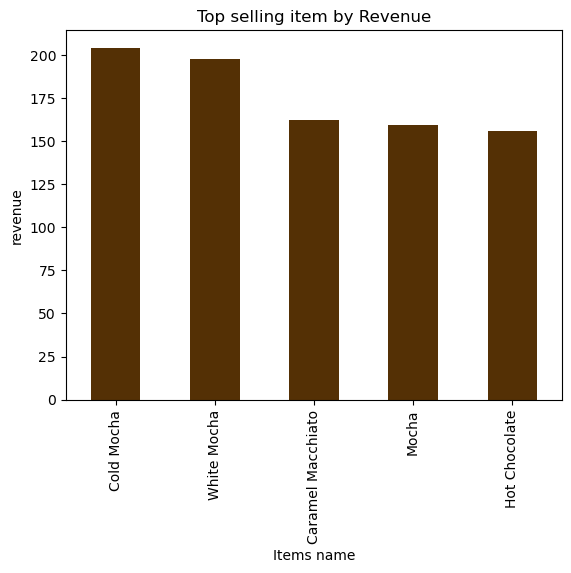

In [16]:
top_selling_item_by_revenue= df.groupby('item_name')['revenue'].sum().sort_values(ascending= False).head()
top_selling_item_by_revenue.plot(kind= 'bar',cmap= 'BrBG')
plt.xlabel('Items name')
plt.ylabel('revenue')
plt.title('Top selling item by Revenue')
plt.show()

In [17]:
df['created_at']= pd.to_datetime(df['created_at'],format= 'mixed')

In [18]:
df['created_at']= pd.to_datetime(df['created_at'])

In [19]:
df['weekday']= df['created_at'].dt.day_name()

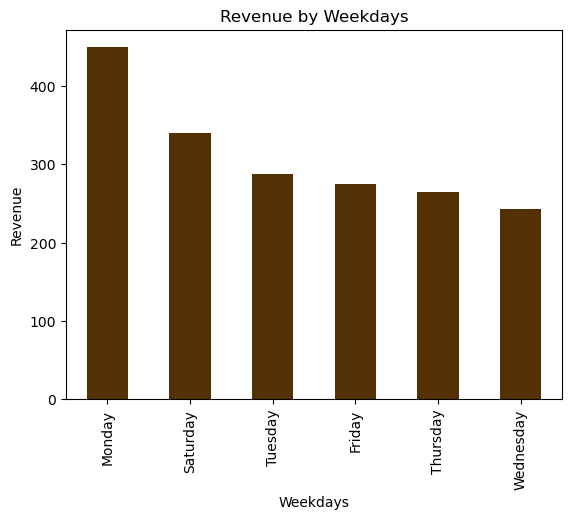

In [20]:
revenue_by_day_of_week= df.groupby('weekday')['revenue'].sum().sort_values(ascending= False)
revenue_by_day_of_week.plot(kind= 'bar',cmap= 'BrBG')
plt.xlabel('Weekdays')
plt.ylabel('Revenue')
plt.title('Revenue by Weekdays')
plt.show()

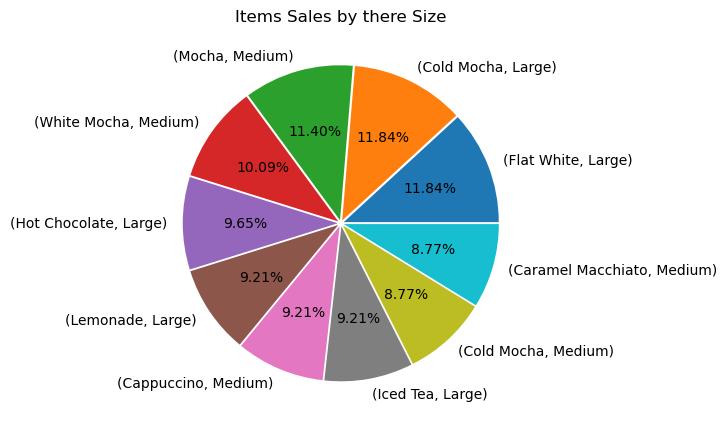

In [21]:
plt.figure(figsize= (5,6))
top_item_sales_by_size= df.groupby(['item_name','item_size'])['quantity'].sum().sort_values(ascending= False).head(10)
top_item_sales_by_size.plot(kind= 'pie',autopct= '%1.2f%%',explode= [0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02])
plt.ylabel(' ')
plt.title('Items Sales by there Size')
plt.show()

In [22]:
# The average amount of money a customer spends on an order.

In [23]:
avg_spending_per_order= df.groupby('order_id')['revenue'].sum().mean()
print(f'Average spending per order : {avg_spending_per_order}')

Average spending per order : 4.7749357326478155


In [24]:
# The average total amount a customer spends across all their orders.

In [25]:
avg_spending_per_cust= df.groupby('cust_name')['revenue'].sum().mean()
print(f'Average spending per customer : {avg_spending_per_cust}')

Average spending per customer : 13.362949640287768


In [26]:
df['in_or_out'].replace({' ':'in'},inplace= True)

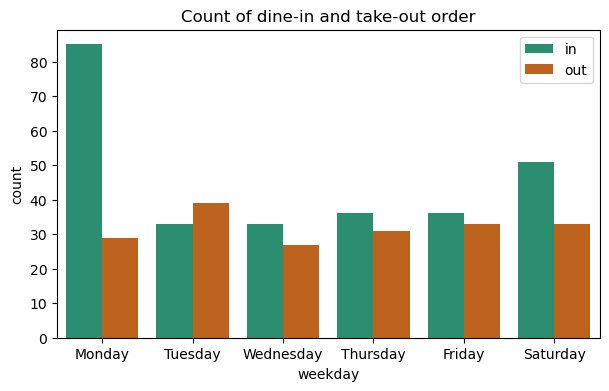

In [27]:
plt.figure(figsize= (7,4))
sns.countplot(x= 'weekday',hue= 'in_or_out',data= df,palette= 'Dark2')
plt.legend(['in','out'])
plt.title('Count of dine-in and take-out order')
plt.show()